# Joint Distributions with Positive ZOCs

In [14]:
import numpy as np
from scipy import stats
from scipy import optimize
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact

In the following, we show some of the copulas that describe joint distributions which achieve a positive ZOC.

# Rayleigh Fading

In [19]:
from rayleigh_fading import zero_outage_capacity

In [20]:
def plot_zero_out_lambda():
    snr_db = np.linspace(-5, 15, 50)
    SNR_X_DB, SNR_Y_DB = np.meshgrid(snr_db, snr_db)
    SNR_X = 10**(SNR_X_DB/10.)
    SNR_Y = 10**(SNR_Y_DB/10.)
    fig, ax = plt.subplots(1,1)
    def plot_copula(t=.5, alpha_x=1, alpha_y=1):
        LX = 1/(SNR_X*alpha_x)
        LY = 1/(SNR_Y*alpha_y)
        ax.clear()
        ax.set_xlim([min(snr_db), max(snr_db)])
        ax.set_ylim([min(snr_db), max(snr_db)])
        ax.set_xlabel("$\\rho_x$ [dB]")
        ax.set_ylabel("$\\rho_y$ [dB]")
        capac = zero_outage_capacity(t, LX, LY)
        ax.pcolormesh(SNR_X_DB, SNR_Y_DB, capac, vmin=0, alpha=.5)
        if t > 0:
            _contour = ax.contour(SNR_X_DB, SNR_Y_DB, capac, vmin=0)
            ax.clabel(_contour, inline=1, fontsize=9)
    interact(plot_copula, t=(0, 1, .01), alpha_x=(.5, 2, .1), alpha_y=(.5, 2, .1))

<IPython.core.display.Javascript object>


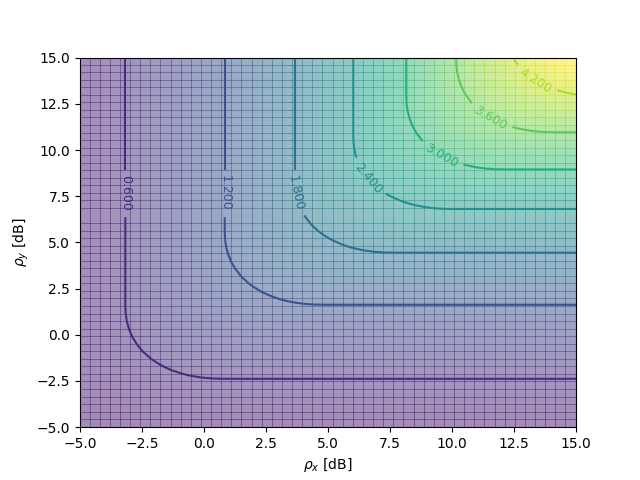

interactive(children=(FloatSlider(value=0.5, description='t', max=1.0, step=0.01), FloatSlider(value=1.0, desc…

In [21]:
plot_zero_out_lambda()

In [24]:
#https://docs.python.org/3/library/itertools.html#itertools-recipes
from itertools import tee
def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

In [37]:
def _opt_x(x, t, rv_x, rv_y):
    return rv_y.pdf(rv_y.ppf(t-rv_x.cdf(x)))-rv_x.pdf(x)

def plot_joint_density():
    a, stepsize = np.linspace(0, 5, 150, retstep=True)
    A, B = np.meshgrid(a, a)
    fig, ax = plt.subplots(1,1)
    def plot_copula(t=.5, snr_x_db=0, snr_y_db=0):
        snr_x = 10**(snr_x_db/10.)
        snr_y = 10**(snr_y_db/10.)
        rv_x = stats.expon(scale=snr_x)
        rv_y = stats.expon(scale=snr_y)
        cdf_x = rv_x.cdf(A)
        cdf_y = rv_y.cdf(B)
        joint_cdf = zoc_copula2(cdf_x, cdf_y, t=t)
        ax.clear()
        _gradx = np.gradient(joint_cdf, stepsize, axis=0)
        joint_pdf = np.gradient(_gradx, stepsize, axis=1)
        ax.set_xlim([0, 5])
        ax.set_ylim([0, 5])
        ax.pcolormesh(A, B, joint_pdf, vmin=0)
        #TODO: Add xopt for Rayleigh fading
        ax.plot(a, rv_y.ppf(t-rv_x.cdf(a)), 'r-')
        ax.plot([0, rv_y.ppf(t)], [rv_y.ppf(t), 0], 'w--')
        ax.plot([0, rv_x.ppf(t)], [rv_x.ppf(t), 0], 'w--')
    interact(plot_copula, t=(0, 1, .05), snr_x_db=(-5, 10, 1), snr_y_db=(-5, 10, 1))

<IPython.core.display.Javascript object>


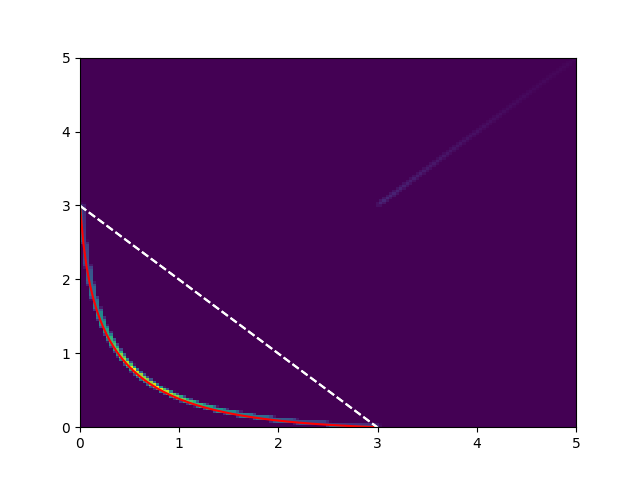

interactive(children=(FloatSlider(value=0.5, description='t', max=1.0, step=0.05), FloatSlider(value=1.0, desc…

In [38]:
plot_joint_density()